In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Configurações globais para os gráficos
sns.set(style='whitegrid')

In [3]:
# Considerando nosso valores, temos:
x: list[float] = [-0.2, 0.1, 0.5, 0.8, 1, 1.4, 1.9, 2.2, 2.5, 3]
y: list[float] = [1.8, 2.2, 2.5, 3.0, 3.2, 4.0, 5.2, 6.0, 7.0, 8.9]

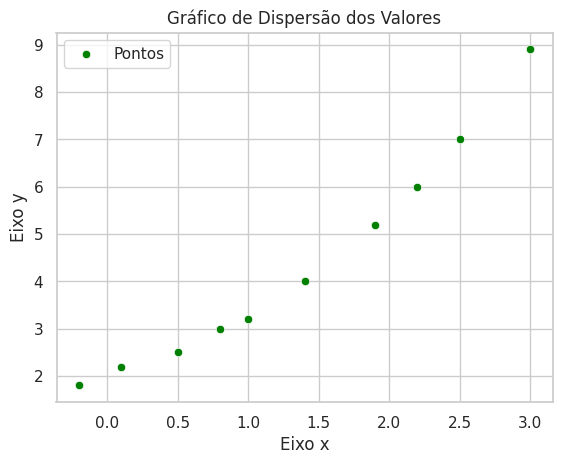

In [4]:
# Plotando um gráfico de dispersão conseguimos observar os seguintes valores:
plt.title('Gráfico de Dispersão dos Valores')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

sns.scatterplot(x=x, y=y, color='green', label='Pontos')

plt.legend()
plt.show()

In [5]:
# Desenvolvendo o método dos mínimos quadrados:
def min_quad(x: list[float], y: list[float]) -> tuple[float, float]:
    # Calculamos a quantidade n de pontos
    n = len(x)
    # Calculamos os vetores (x * y) e (x ** 2)
    x_y: list[float] = [(xi * yi) for xi, yi in zip(x, y)]
    x_2: list[float] = [(xi ** 2) for xi in x]
    # Calculamos o coeficiente ângular (w) e linear (b)
    w: float = (n * sum(x_y) - sum(x) * sum(y)) / (n * sum(x_2) - sum(x) ** 2)
    b: float = (sum(y) - w * sum(x)) / n
    # Retornamos os resultados encontrados
    return w, b

In [6]:
# Desenvolvendo o cálculo do erro:
def error(y: list[float], y_p: list[float]) -> float:
    err: float = sum([(yi - yi_p) ** 2 for yi, yi_p in zip(y, y_p)])
    return err

In [7]:
# Encontrando os coeficientes para G(x) que melhor aproxima os valores lineares
w, b = min_quad(x, y)
# Função linear encontrada
G_x = lambda x: (w * x) + b
# Valores de y obtidos
y_lin = [G_x(xi) for xi in x]

In [8]:
# Printando os resultados obtidos
print(f'G(x) = {w} * x + {b}')
print(f'Erro: {error(y, y_lin)}')

G(x) = 2.1397405660377364 * x + 1.5555424528301878
Erro: 2.38528891509434


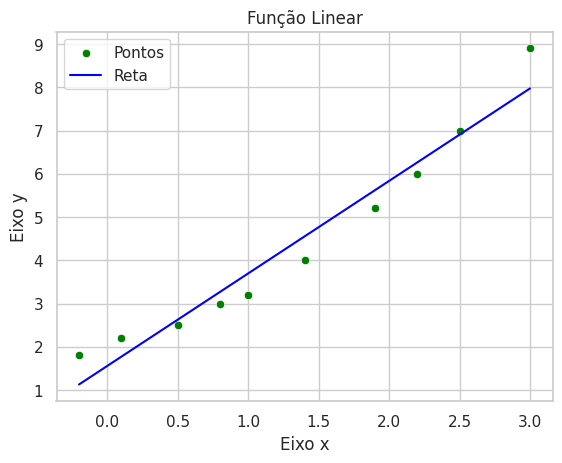

In [9]:
# Plotando o gŕafico da função linear:
plt.title('Função Linear')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

sns.scatterplot(x=x, y=y, color='green', label='Pontos')
sns.lineplot(x=x, y=y_lin, color='blue', label='Reta')

plt.legend()
plt.show()

In [10]:
# Transformando os valores de y para exponencial
ln_y = [math.log(yi) for yi in y]
# Encontrando os coeficientes para G(x) que melhor aproxima os valores exponenciais
w, b = min_quad(x, ln_y)
# Transformando o coeficiente linear para exponencial
b = math.exp(b)
# Função linear encontrada
G_x = lambda x: b * math.exp(w * x)
# Valores de y obtidos
y_exp = [G_x(xi) for xi in x]

In [11]:
# Printando os resultados obtidos
print(f'G(x) = {b} * e ^ ({w} * x)')
print(f'Erro: {error(y, y_exp)}')

G(x) = 2.0029396988525834 * e ^ (0.4974857749389303 * x)
Erro: 0.02863359944390456


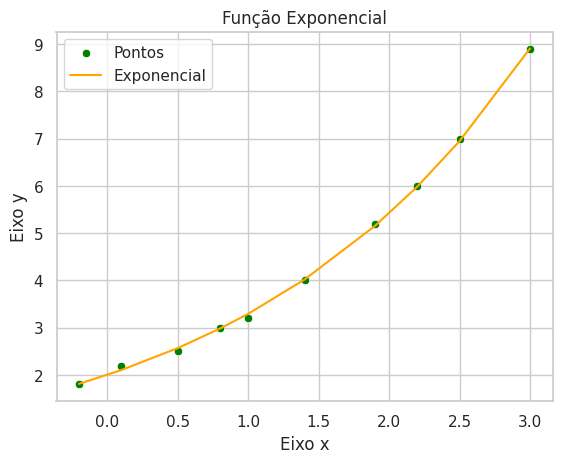

In [12]:
# Plotando o gŕafico da função exponencial:
plt.title('Função Exponencial')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

sns.scatterplot(x=x, y=y, color='green', label='Pontos')
sns.lineplot(x=x, y=y_exp, color='orange', label='Exponencial')

plt.legend()
plt.show()

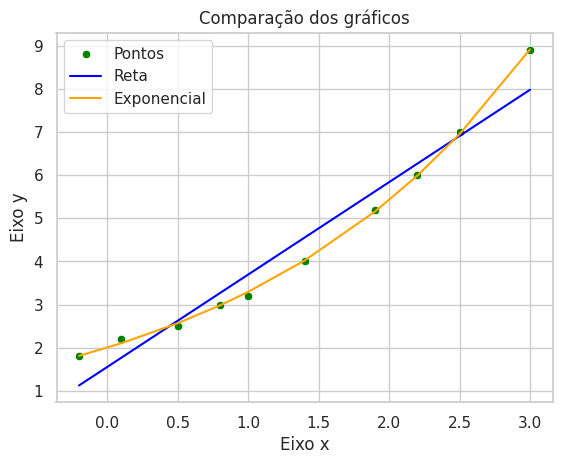

In [13]:
# Comparando os gráficos obtidos:
plt.title('Comparação dos gráficos')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

sns.scatterplot(x=x, y=y, color='green', label='Pontos')
sns.lineplot(x=x, y=y_lin, color='blue', label='Reta')
sns.lineplot(x=x, y=y_exp, color='orange', label='Exponencial')

plt.legend()
plt.show()